In [1]:
import numpy as np
import pandas as pd
from warnings import filterwarnings
filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("../data/train/train.csv")
df.tail()

,Day,Hour,Minute,DHI,DNI,WS,RH,T,TARGET
52555,1094,21,30,0,0,2.4,70.70,-4,0.0
52556,1094,22,0,0,0,2.4,66.79,-4,0.0
52557,1094,22,30,0,0,2.2,66.78,-4,0.0
52558,1094,23,0,0,0,2.1,67.72,-4,0.0
52559,1094,23,30,0,0,2.1,67.70,-4,0.0


##### Hour - 시간
##### Minute - 분
##### DHI - 수평면 산란일사량(Diffuse Horizontal Irradiance (W/m2))
##### DNI - 직달일사량(Direct Normal Irradiance (W/m2))
##### WS - 풍속(Wind Speed (m/s))
##### RH - 상대습도(Relative Humidity (%))
##### T - 기온(Temperature (Degree C))
##### Target - 태양광 발전량 (kW)

## 전천일사량 = 직달일사량*cos(천정각)+산란일사량 

## 천정각 = 90-태양의 고도

In [3]:
# 각도별 전천일사량과 발전량과의 상관계수
import math
corrList = []
corr = lambda p : p['TARGET'].corr(p['GHI'])

def makeCorrList(df):
    result = corr(df)
    corrList.append(result)

for i in range(0,90):
    df['GHI'] = df['DNI']*math.cos(math.pi/180*i)+df['DHI']
    makeCorrList(df)

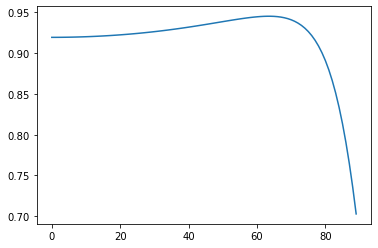

In [4]:
x = np.arange(0,90)
plt.plot(x,corrList)
plt.show()

In [5]:
print(corrList.index(max(corrList)), max(corrList))

63 0.9451229383187134


In [6]:
count = 0
for i in range(len(corrList)):
    if corrList[i] > 0.94:
        count += 1
        print(i, corrList[i])

53 0.9405592673399533
54 0.9412158287669582
55 0.9418503509865916
56 0.9424564792995959
57 0.943026885290203
58 0.9435531175158655
59 0.9440254283416155
60 0.9444325730023224
61 0.9447615763545353
62 0.9449974620791447
63 0.9451229383187134
64 0.9451180328867801
65 0.9449596702911828
66 0.9446211819065804
67 0.9440717397767302
68 0.9432757038272468
69 0.9421918718826905
70 0.9407726220451413


In [7]:
df['GHI'] = df['DNI']*math.cos(math.pi/180*63)+df['DHI']

In [8]:
df.head(25)

,Day,Hour,Minute,DHI,DNI,WS,RH,T,TARGET,GHI
0,0,0,0,0,0,1.5,69.08,-12,0.000000,0.000000
1,0,0,30,0,0,1.5,69.06,-12,0.000000,0.000000
2,0,1,0,0,0,1.6,71.78,-12,0.000000,0.000000
3,0,1,30,0,0,1.6,71.75,-12,0.000000,0.000000
4,0,2,0,0,0,1.6,75.20,-12,0.000000,0.000000
5,0,2,30,0,0,1.5,69.29,-11,0.000000,0.000000
6,0,3,0,0,0,1.5,72.56,-11,0.000000,0.000000
7,0,3,30,0,0,1.4,72.55,-11,0.000000,0.000000
8,0,4,0,0,0,1.3,74.62,-11,0.000000,0.000000
9,0,4,30,0,0,1.3,74.61,-11,0.000000,0.000000


<Figure size 720x576 with 0 Axes>

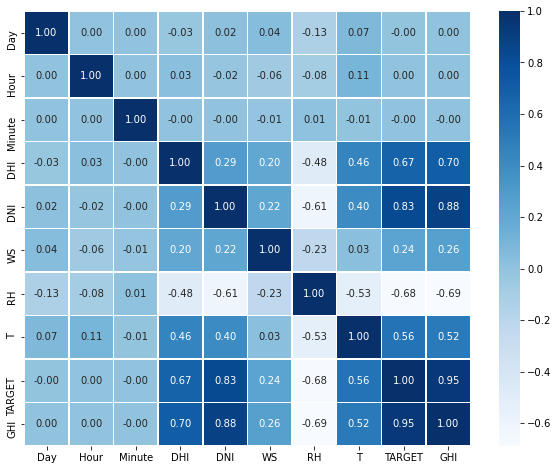

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(data=df.corr(), annot=True,
fmt='.2f', linewidths=.5, cmap='Blues')

In [10]:
df.head(30)

,Day,Hour,Minute,DHI,DNI,WS,RH,T,TARGET,GHI
0,0,0,0,0,0,1.5,69.08,-12,0.000000,0.000000
1,0,0,30,0,0,1.5,69.06,-12,0.000000,0.000000
2,0,1,0,0,0,1.6,71.78,-12,0.000000,0.000000
3,0,1,30,0,0,1.6,71.75,-12,0.000000,0.000000
4,0,2,0,0,0,1.6,75.20,-12,0.000000,0.000000
5,0,2,30,0,0,1.5,69.29,-11,0.000000,0.000000
6,0,3,0,0,0,1.5,72.56,-11,0.000000,0.000000
7,0,3,30,0,0,1.4,72.55,-11,0.000000,0.000000
8,0,4,0,0,0,1.3,74.62,-11,0.000000,0.000000
9,0,4,30,0,0,1.3,74.61,-11,0.000000,0.000000


### First Modeling

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.metrics import accuracy_score

In [16]:
X = np.array(df.loc[:, ["GHI", "WS", "RH", "T"]].values)
y = np.array(df.loc[:, ["TARGET"]].values)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [18]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression

GBR_model = GradientBoostingRegressor(learning_rate=0.1, n_estimators=500, max_depth=3)
RFR_model = RandomForestRegressor(n_estimators=500, max_features=0.25)
SVR_model = SVR(kernel = 'rbf')
ETR_model = ExtraTreesRegressor(n_estimators=1000)
LR_model = LinearRegression()

models = [GBR_model, RFR_model, SVR_model, ETR_model, LR_model]

def run_model(model_list):

    for model in model_list:
        model.fit(X_train, y_train)
        print(str(model).split('(')[0] + '_score :', model.score(X_test, y_test))

run_model(models)

GradientBoostingRegressor_score : 0.976400558722771
RandomForestRegressor_score : 0.9766676033917021
SVR_score : 0.9637193092896643
ExtraTreesRegressor_score : 0.9764688434807267
LinearRegression_score : 0.9007131001656041


In [30]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error 
def MAPE(y_test, y_pred):
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100 

def MPE(y_test, y_pred): 
    return np.mean((y_test - y_pred) / y_test) * 100

In [34]:
models

[GradientBoostingRegressor(n_estimators=500),
 RandomForestRegressor(max_features=0.25, n_estimators=500),
 SVR(),
 ExtraTreesRegressor(n_estimators=1000),
 LinearRegression()]

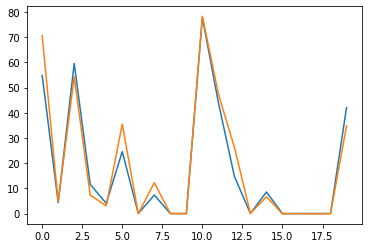

GradientBoostingRegressor(n_estimators=500)
MSE:  15.643654715813435
RMSE:  3.9552060269742504
MAE:  2.1359009436675134
MAPE:  inf
MPE nan


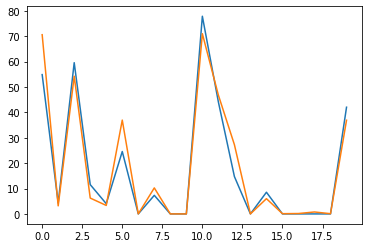

RandomForestRegressor(max_features=0.25, n_estimators=500)
MSE:  15.466635499748874
RMSE:  3.9327643585331775
MAE:  2.1672603876459853
MAPE:  nan
MPE nan


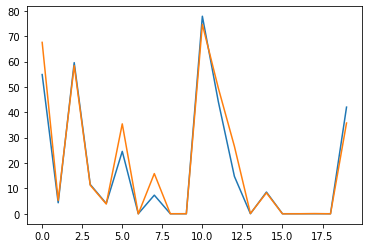

SVR()
MSE:  24.049832013241343
RMSE:  4.904062806820621
MAE:  2.611134835557529
MAPE:  inf
MPE nan


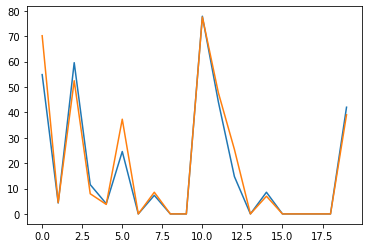

ExtraTreesRegressor(n_estimators=1000)
MSE:  15.598389950293615
RMSE:  3.949479706276969
MAE:  2.0156557697938284
MAPE:  nan
MPE nan


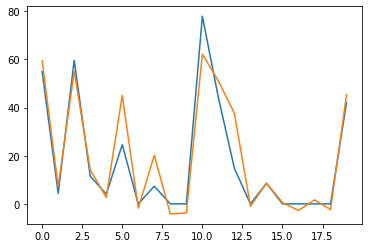

LinearRegression()
MSE:  65.8155403158433
RMSE:  8.112677752495983
MAE:  5.296032717763426
MAPE:  inf
MPE nan


In [ ]:
def show_predict(model_list, X, y):
    for model in model_list:
        y_predict = model.predict(X)
        plt.plot(range(20), y[20:40])
        plt.plot(range(20), y_predict[20:40])
        plt.show()
        mse = mean_squared_error(y_test, y_predict)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, y_predict)
        mape= MAPE(y_test, y_predict)
        mpe = MPE(y_test, y_predict)
        print(model)
        print("MSE: ", mse)
        print("RMSE: ", rmse)
        print("MAE: ",mae)
        print("MAPE: ", mape)
        print("MPE", mpe)
show_predict(models, X_test, y_test)